In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
# 1. Load the dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

In [3]:
# 2. Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['Type'].value_counts())


First 5 rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9

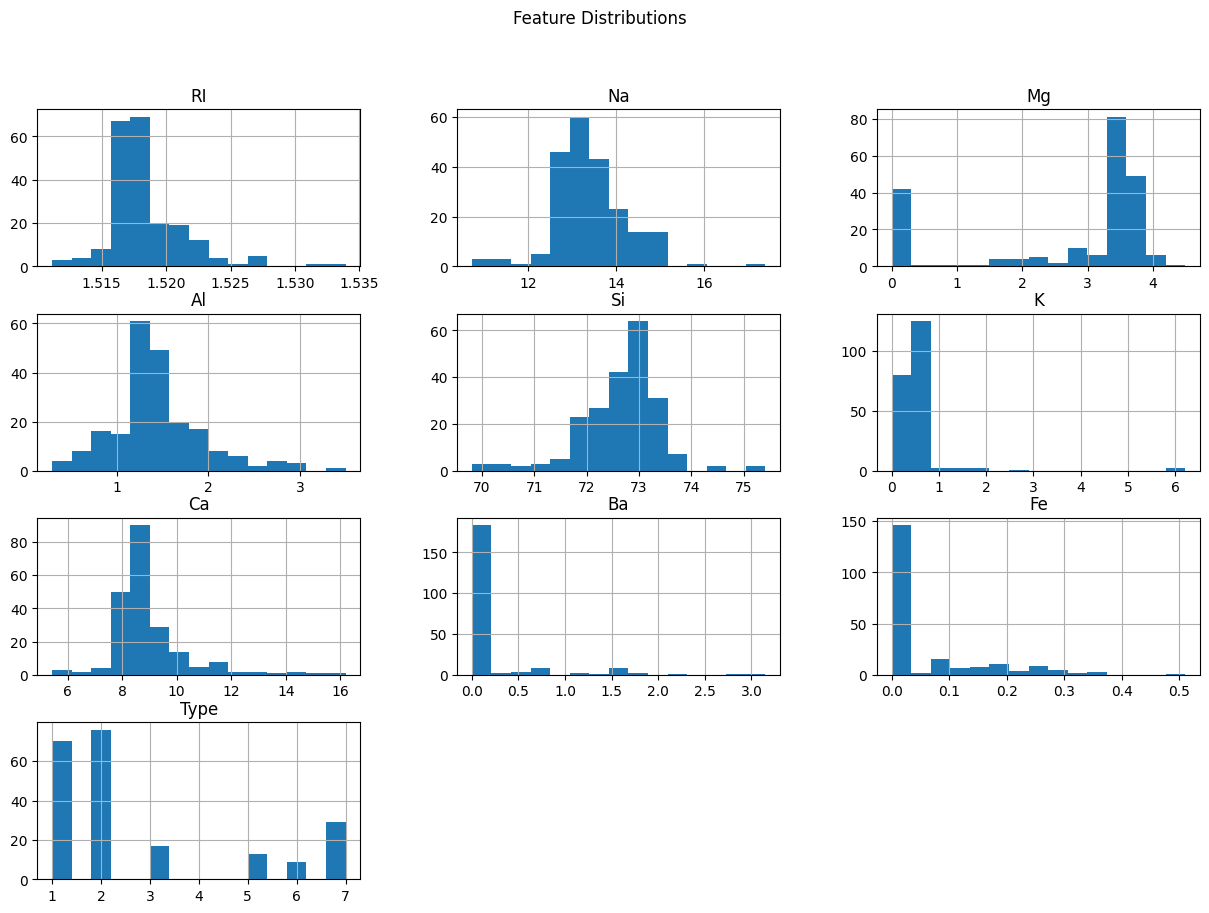

In [4]:
# 3. Data Visualization
# Histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


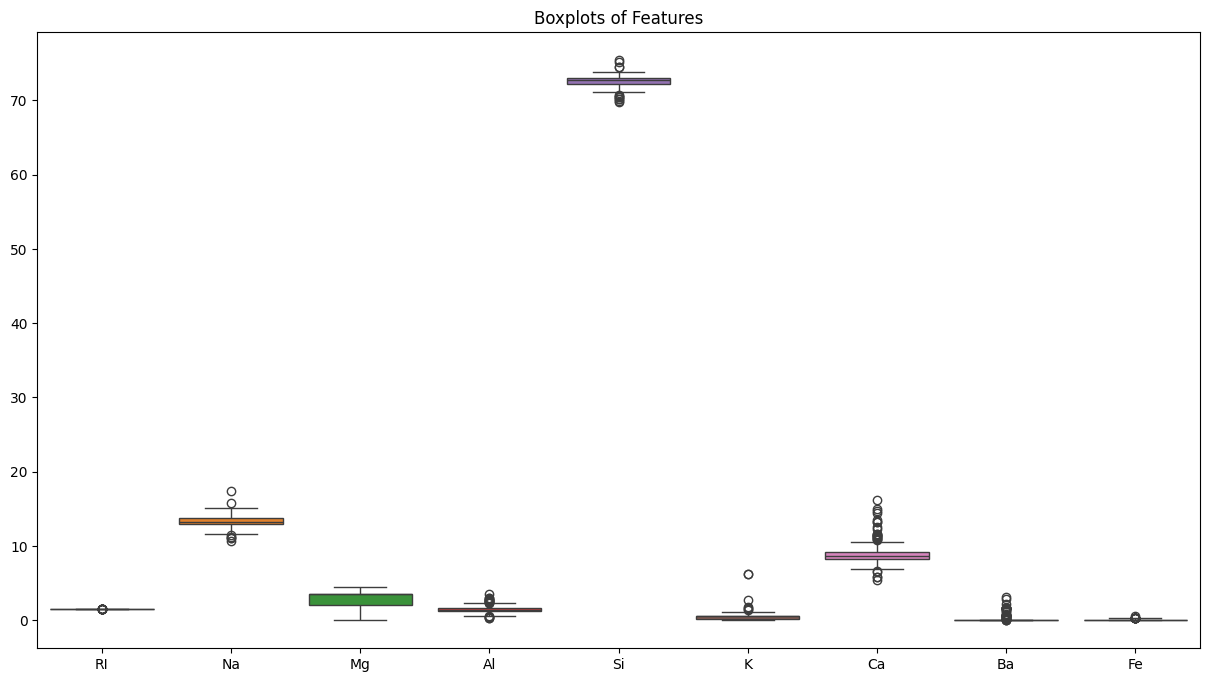

In [5]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title('Boxplots of Features')
plt.show()

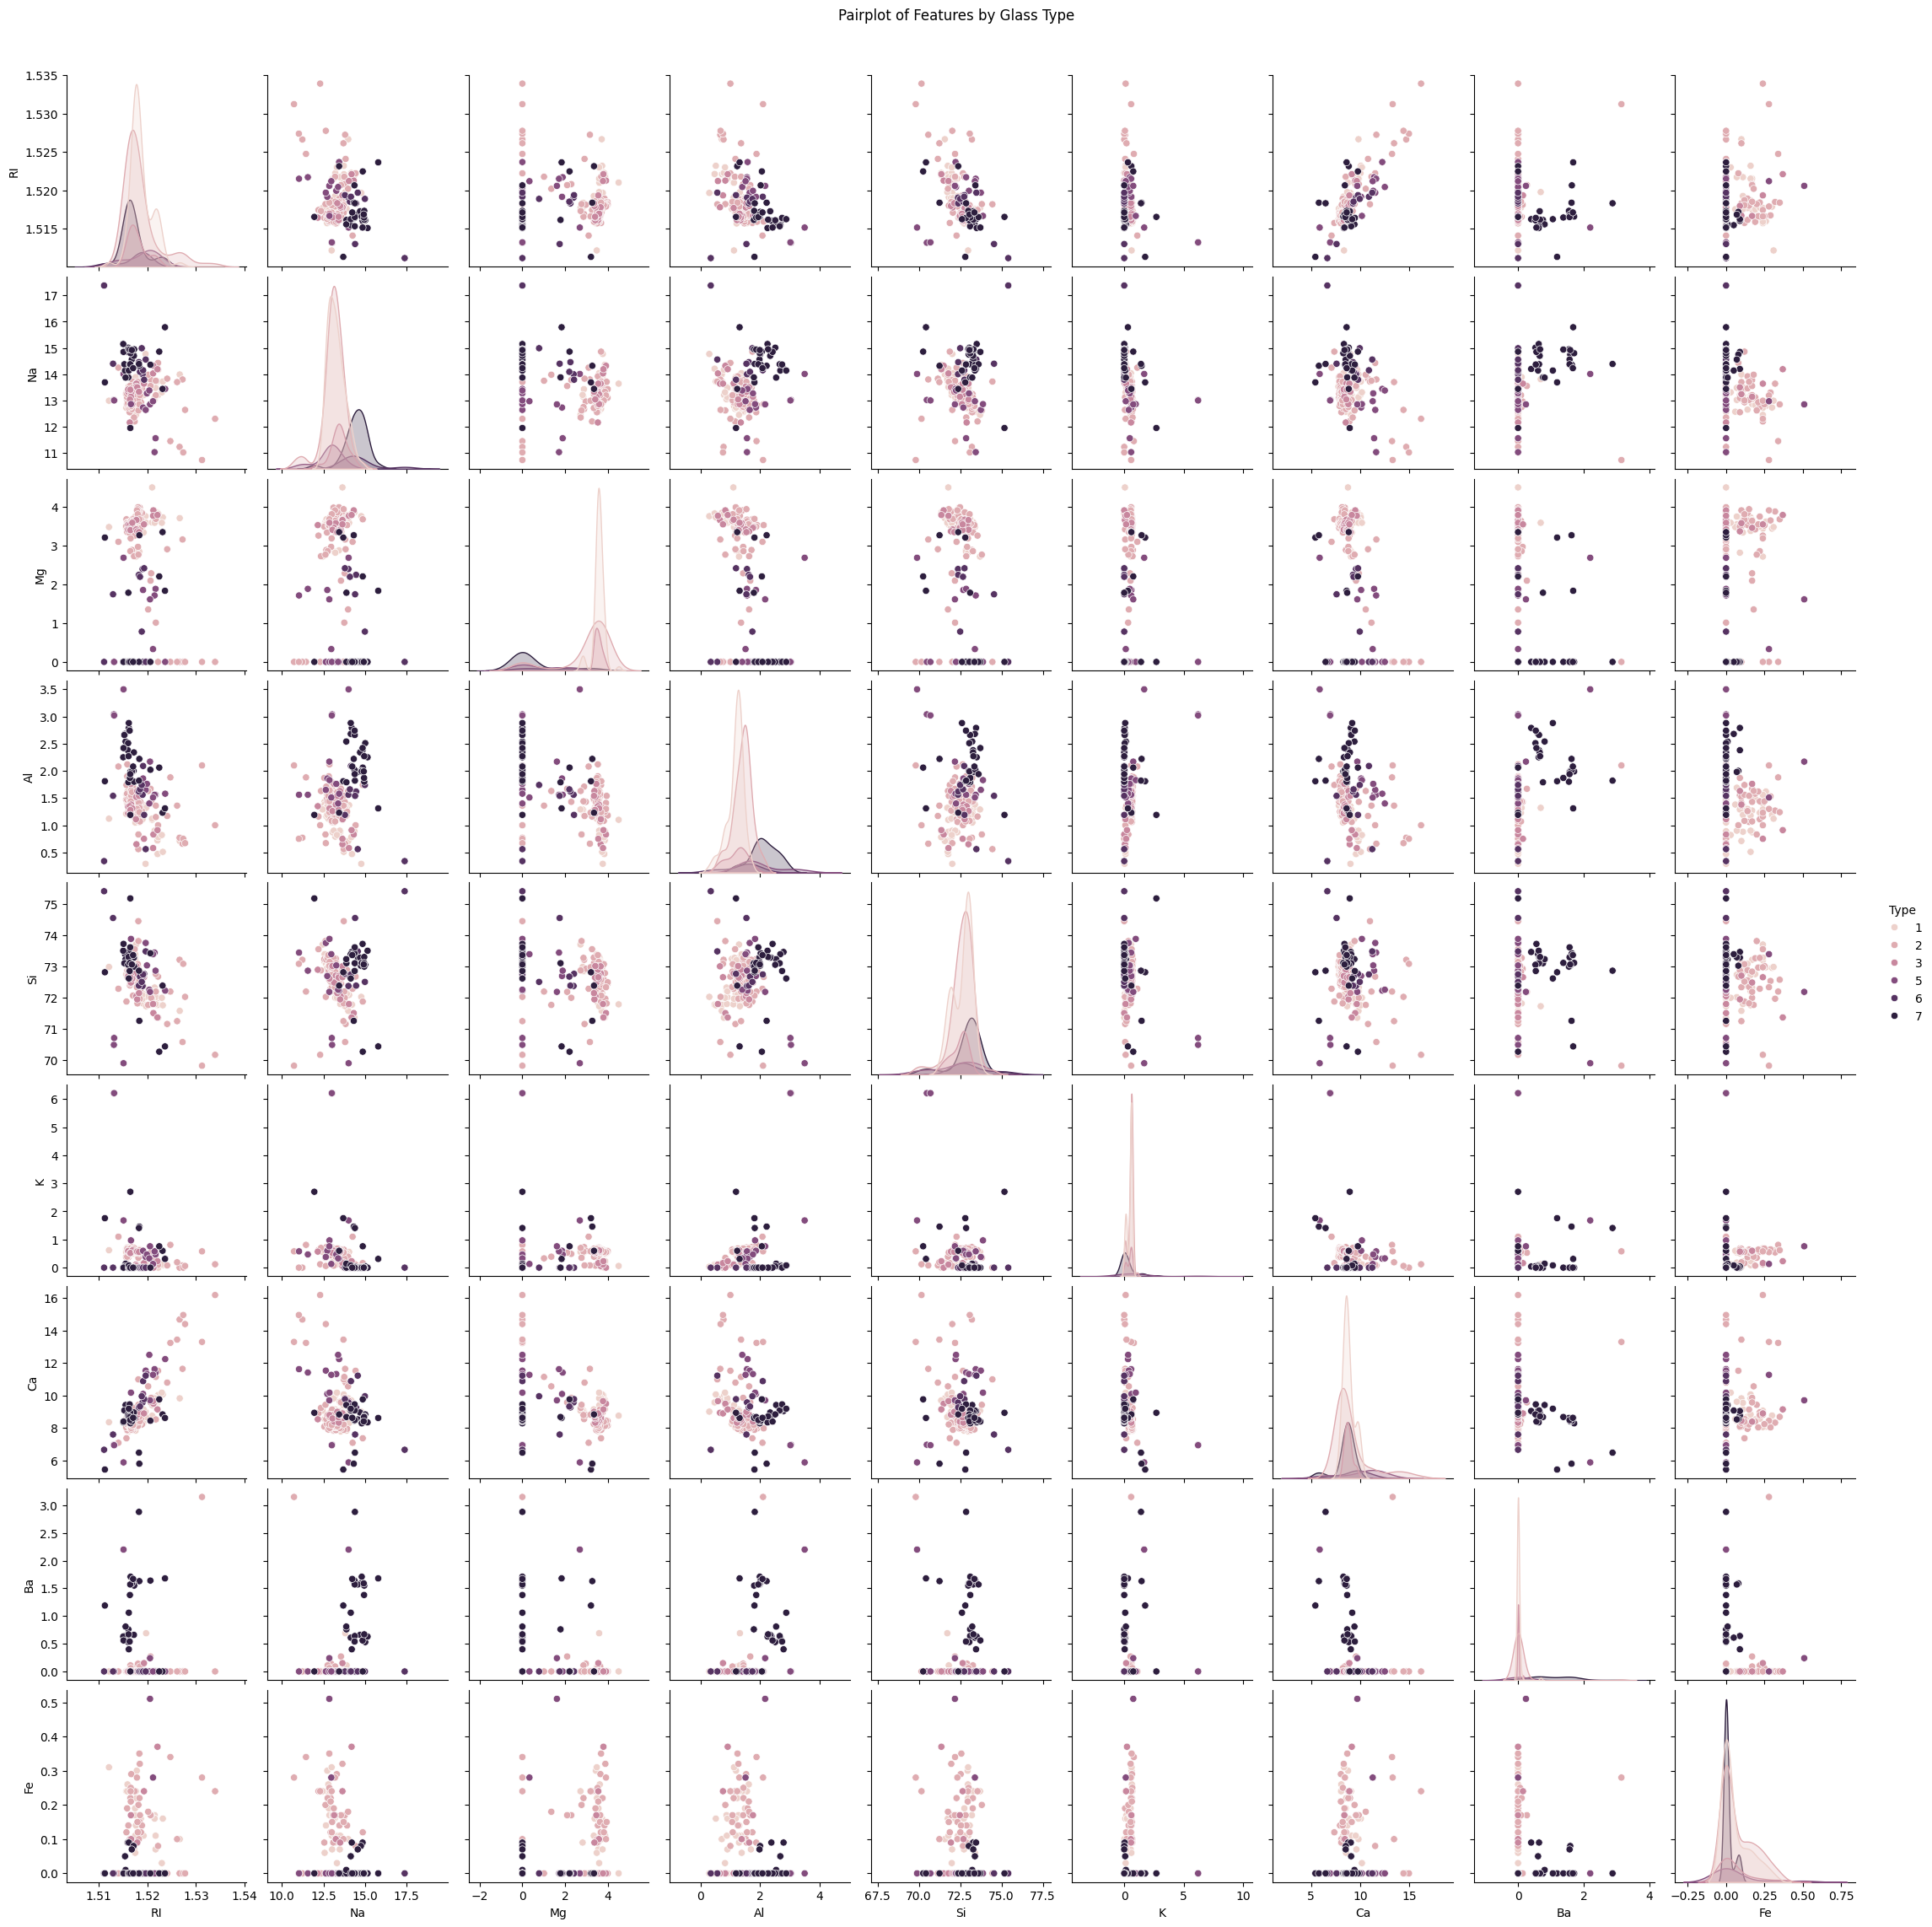

In [6]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.suptitle('Pairplot of Features by Glass Type', y=1.02)
plt.show()

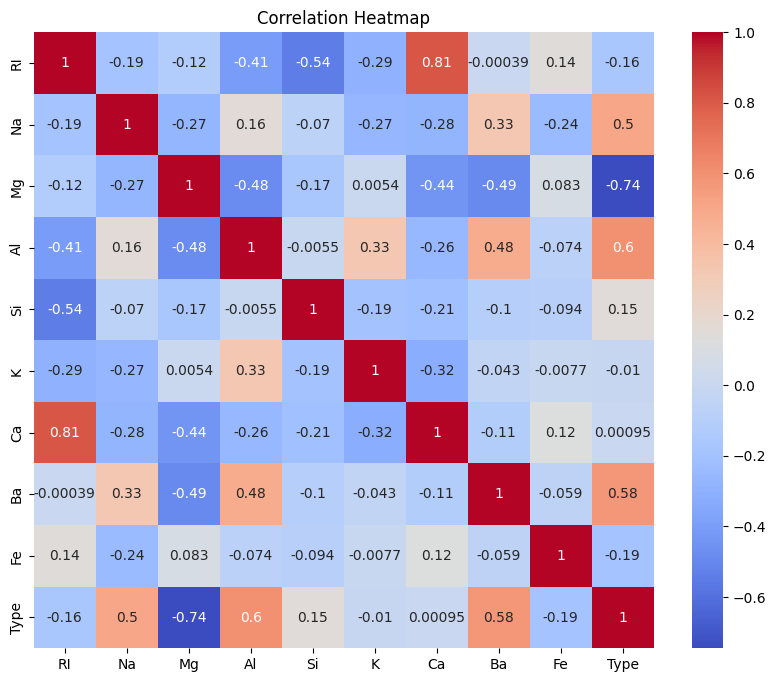

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# 4. Data Preprocessing

# Check for missing values (already shown above)
# If missing values exist, impute with mean (for demonstration)
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)

In [10]:
# No categorical variables in this dataset, so no encoding needed

# Feature scaling
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
print("\nClass distribution before SMOTE:", np.bincount(y))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("Class distribution after SMOTE:", np.bincount(y_resampled))



Class distribution before SMOTE: [ 0 70 76 17  0 13  9 29]
Class distribution after SMOTE: [ 0 76 76 76  0 76 76 76]


In [12]:
# 5. Random Forest Model Implementation

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [13]:
# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92

Random Forest Confusion Matrix:
 [[13  1  1  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  0 13  0  0  0]
 [ 0  0  0 15  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  1  0 14]]
Random Forest Accuracy: 0.9130434782608695


In [14]:
# 6. Bagging and Boosting Methods

# Bagging Classifier
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
print("\nBagging Classification Report:")
print(classification_report(y_test, y_pred_bag))
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.85      0.73      0.79        15
           3       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16
           6       0.94      1.00      0.97        16
           7       0.93      0.93      0.93        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

Bagging Accuracy: 0.8913043478260869


In [15]:
# Boosting Classifier (AdaBoost)
boosting = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)
print("\nBoosting (AdaBoost) Classification Report:")
print(classification_report(y_test, y_pred_boost))
print("Boosting (AdaBoost) Accuracy:", accuracy_score(y_test, y_pred_boost))




Boosting (AdaBoost) Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.60      0.47        15
           2       0.25      0.20      0.22        15
           3       0.47      0.47      0.47        15
           5       0.75      0.38      0.50        16
           6       0.67      1.00      0.80        16
           7       0.60      0.40      0.48        15

    accuracy                           0.51        92
   macro avg       0.52      0.51      0.49        92
weighted avg       0.52      0.51      0.49        92

Boosting (AdaBoost) Accuracy: 0.5108695652173914


In [16]:
# 7. Comparison Table
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Boosting (AdaBoost)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_boost)
    ]
})
print("\nModel Comparison Table:")
print(results)


Model Comparison Table:
                 Model  Accuracy
0        Random Forest  0.913043
1              Bagging  0.891304
2  Boosting (AdaBoost)  0.510870


# Summary
Dataset and Objective
The Glass dataset contains chemical properties of glass samples, with the goal of classifying each sample into one of several glass types (such as building windows, containers, tableware, and headlamps) based on features like refractive index and elemental composition.

Exploratory Data Analysis (EDA)
EDA was performed to understand the dataset structure, check for missing values, outliers, and class imbalance. The dataset was found to have no missing values and a significant imbalance among glass types, with some classes having far fewer samples than others.

Data Visualization
Visualizations such as histograms, box plots, pair plots, and correlation heatmaps were created. These helped reveal the distribution of features, presence of outliers, and relationships between variables. Some features showed strong correlations, which can influence model performance.

Data Preprocessing
Missing values were handled (if present) by imputation.

No categorical variables required encoding.

Features were scaled using standardization to ensure equal contribution to the model.

Class imbalance was addressed using SMOTE, a technique that generates synthetic samples for minority classes to balance the dataset.

Random Forest Model Implementation
The data was split into training and test sets.

A Random Forest classifier was trained and evaluated using accuracy, precision, recall, and F1-score.

The model performed well, benefiting from the ensemble approach of Random Forests, which reduces overfitting and improves generalization.

Bagging and Boosting Methods
Bagging (Bootstrap Aggregating) was applied using a BaggingClassifier, which trains multiple models on random subsets and averages their predictions to reduce variance.

Boosting was applied using AdaBoost, which trains models sequentially, focusing on correcting previous errors to reduce bias.

Both methods were compared with Random Forests, showing differences in accuracy and robustness depending on the dataset and class distribution